In [2]:
# code will filter out all the warnings
import warnings
warnings.filterwarnings('ignore')

IMPORT LIBRARIES

In [3]:
import pandas_datareader as web
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from datetime import date


In [4]:
#Import data using pandas datareader select data range of your choice


In [5]:
df=web.DataReader('GOOGL',data_source='yahoo',start='2012-01-01',end='2021-02-28')

In [6]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,334.409424,326.511505,326.796783,333.038025,7345647.0,333.038025
2012-01-04,335.460449,330.640656,332.847839,334.474487,5722272.0,334.474487
2012-01-05,332.317322,328.443451,331.396393,329.834839,6559234.0,329.834839
2012-01-06,330.330322,325.220215,329.904907,325.335327,5380414.0,325.335327
2012-01-09,323.823822,310.925934,323.573578,311.541534,11633555.0,311.541534


In [7]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-22,2080.330078,2048.000000,2053.600098,2054.260010,1473300.0,2054.260010
2021-02-23,2072.500000,1990.229980,2013.989990,2060.120117,1732900.0,2060.120117
2021-02-24,2088.320068,2027.530029,2030.040039,2083.810059,1130400.0,2083.810059
2021-02-25,2083.000000,2006.489990,2055.929932,2015.949951,2077400.0,2015.949951
2021-02-26,2056.520020,2001.010010,2029.949951,2021.910034,2001500.0,2021.910034


In [8]:
df.shape

(2303, 6)

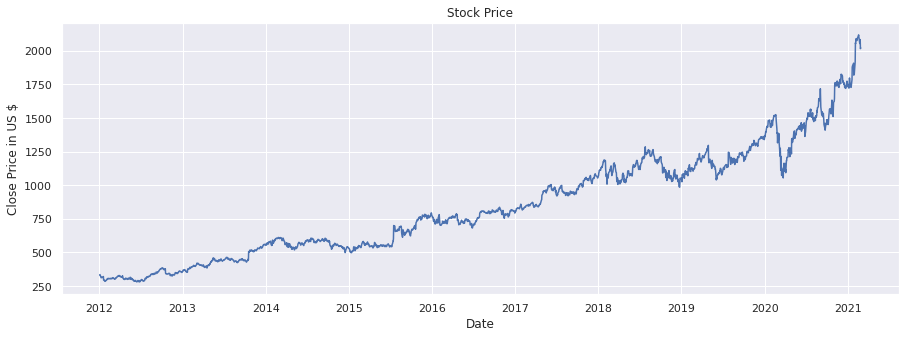

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df.Close)
plt.title("Stock Price")
plt.xlabel("Date")
plt.ylabel("Close Price in US $");


## Seperate out the Close Column as we will be working on the Closing Values

In [11]:
close=df.filter(['Close'])

In [12]:
close.head()

,Close
Date,
2012-01-03,333.038025
2012-01-04,334.474487
2012-01-05,329.834839
2012-01-06,325.335327
2012-01-09,311.541534


In [13]:
#change the values to numpy array
close_stock=close.values

In [14]:
type(close_stock)

numpy.ndarray

Prepare and scale the training data

In [15]:
training_data_length=math.ceil(len(close_stock)*0.8)

In [16]:
training_data_length

1843

In [17]:
mms=MinMaxScaler(feature_range=(0, 1))

In [18]:
scaled_close_stock=mms.fit_transform(close_stock)

In [19]:
training_data=scaled_close_stock[0:training_data_length,:]

In [20]:
len(training_data)

1843

In [21]:
training_data_length

1843

#Make x train and y train

In [24]:
X_train=[]
y_train=[]

In [25]:
for i in range(60 ,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

#Change x_train and y_train in to numpy arrays

In [26]:
X_train,y_train=np.array(X_train),np.array(y_train)

In [27]:
print(type(X_train))
print(type(y_train))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
print(X_train.ndim)
print(X_train.shape)

2
(1783, 60)


In [30]:
X_train[:1]

array([[0.02894973, 0.02973092, 0.02720775, 0.02476079, 0.01725933,
        0.01744443, 0.01821199, 0.01921363, 0.01794796, 0.01892512,
        0.02010368, 0.02191644, 0.0073327 , 0.00720476, 0.00595544,
        0.00284162, 0.00246328, 0.00569685, 0.00507355, 0.00573224,
        0.00592822, 0.00709317, 0.01014711, 0.01362021, 0.01298873,
        0.01382706, 0.01426529, 0.01275466, 0.0144667 , 0.01380257,
        0.01265938, 0.01292069, 0.01240897, 0.01495664, 0.01330718,
        0.01280909, 0.01384067, 0.01368009, 0.01615154, 0.01611344,
        0.017243  , 0.01693   , 0.01502469, 0.01249607, 0.0129969 ,
        0.01308944, 0.01121407, 0.01254778, 0.0159855 , 0.0154983 ,
        0.01689733, 0.01796157, 0.02039493, 0.02026156, 0.02202804,
        0.02368022, 0.02273844, 0.02457298, 0.02394423, 0.02632315]])

In [32]:
X_train[:1].shape

(1, 60)

### RNN needs data in 3 dimensions , number of Samples, Number of Time Steps and Number of Features So we need to reshape the data

In [33]:
print(X_train.shape)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

(1783, 60)


In [34]:
X_train.shape

(1783, 60, 1)

#Make the LSTM architecture

In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [36]:
model=Sequential()

In [37]:
X_train.shape

(1783, 60, 1)

In [38]:
X_train.shape[1]

60

### input_shape = number of time steps and number of features. In this case number of features is 1

In [39]:
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))


# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))


In [40]:
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [41]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)


Epoch 1/50
56/56 [==============================] - 13s 112ms/step - loss: 0.0185
Epoch 2/50
56/56 [==============================] - 6s 115ms/step - loss: 3.7270e-04
Epoch 3/50
56/56 [==============================] - 6s 115ms/step - loss: 3.4565e-04
Epoch 4/50
56/56 [==============================] - 6s 116ms/step - loss: 3.5834e-04
Epoch 5/50
56/56 [==============================] - 6s 114ms/step - loss: 3.0599e-04
Epoch 6/50
56/56 [==============================] - 6s 113ms/step - loss: 3.3529e-04
Epoch 7/50
56/56 [==============================] - 6s 114ms/step - loss: 2.8873e-04
Epoch 8/50
56/56 [==============================] - 6s 113ms/step - loss: 3.6523e-04
Epoch 9/50
56/56 [==============================] - 6s 116ms/step - loss: 3.0463e-04
Epoch 10/50
56/56 [==============================] - 6s 113ms/step - loss: 3.2924e-04
Epoch 11/50
56/56 [==============================] - 6s 114ms/step - loss: 2.5789e-04
Epoch 12/50
56/56 [==============================] - 6s 114ms/step

## Prepare & reshape the Test Data

In [42]:
test_data=scaled_close_stock[training_data_length-60:,:]


In [43]:
training_data_length

1843

In [44]:
len(test_data)

520

In [45]:
X_test=[]
y_test=close_stock[training_data_length:,:]

In [46]:
for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

In [47]:
len(X_test)

460

In [48]:
X_test=np.array(X_test)

In [49]:
X_test.shape

(460, 60)

In [51]:
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#Make Predictions

In [52]:
y_pred=model.predict(X_test)

In [53]:
y_pred=mms.inverse_transform(y_pred)

In [54]:
pd.DataFrame(y_pred)

,0
0,1188.281128
1,1156.493530
2,1160.091797
3,1181.875000
4,1194.786621
...,...
455,1913.541626
456,1885.582642
457,1886.617065
458,1914.239868


#Plot the data

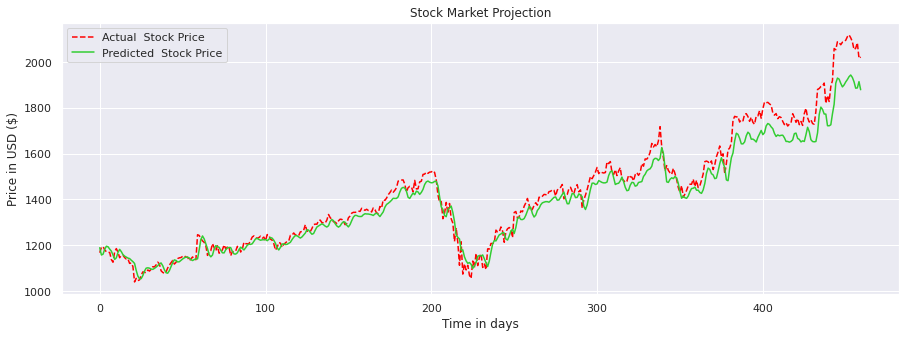

In [56]:
# Visualising the results
plt.figure(figsize=(15,5))
plt.plot(y_test, color = 'red', label = 'Actual  Stock Price',ls='--')
plt.plot(y_pred, color = 'limegreen', label = 'Predicted  Stock Price',ls='-')
plt.title('Stock Market Projection')
plt.xlabel('Time in days')
plt.ylabel('Price in USD ($)')
plt.legend()
plt.show()

#Plot the whole Data Training Testing and Prediction data together

In [57]:
train=close[:training_data_length]
test=close[training_data_length:]
test['pred']=y_pred

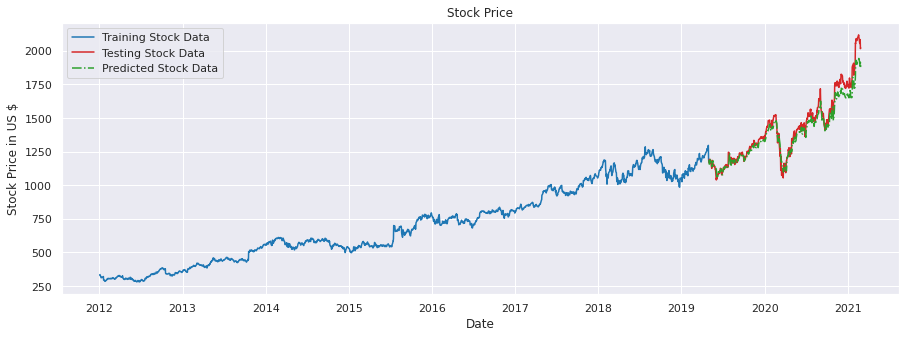

In [58]:
plt.figure(figsize=(15,5))
plt.plot(train['Close'], color = 'tab:blue', label = 'Training Stock Data',ls='-')
plt.plot(test['Close'], color = 'tab:red', label = 'Testing Stock Data',ls='-')
plt.plot(test['pred'], color = 'tab:green', label = 'Predicted Stock Data',ls='dashdot')
plt.title('Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price in US $')
plt.legend()
plt.show()